# Project: Wrangling and Analyze Data


## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#gather">Gather Data</a></li>
    <li><a href="#assess">Assess Data</a></li>
    <li><a href="#clean">Clean Data</a></li>
    <li><a href="#analyze">Analyze Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

<a id='gather'></a>
## Gather Data

In [627]:
# Import library
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import random
%matplotlib inline

### Enhanced Twitter Archive
The WeRateDogs Twitter archive provided as the starting point, and is download manually from the Udacity server: `twitter_archive_enhanced.csv`

In [ ]:
df_twitter_archive = pd.read_csv('dataset/twitter-archive-enhanced.csv')

### Image Predictions File
This file contains the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is also hosted on Udacity's servers and is downloaded [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) programmatically using the Requests library.

In [3]:
# Download file using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = 'dataset'
response = requests.get(url)
with open(os.path.join(folder_name, url.split("/")[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Check if the file is downloaded
os.listdir(folder_name)

['image-predictions.tsv', 'twitter-archive-enhanced.csv']

In [5]:
df_predictions = pd.read_csv('dataset/image-predictions.tsv', sep="\t") # can use delimiter="\t" too

### Download Tweet JSON Data
Query the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. Each tweet's JSON data is written to its own line in a file called "tweet_json.txt file".

In [6]:
# Create the Twitter API object and set rate limit params
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_token_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# Test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [7]:
# Get a list of tweet_ids from the enhanced twitter archive to use for 
# downloading with the Twitter API

tweet_ids = df_twitter_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id,
                               tweet_mode = 'extended',
                               wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  771004394259247104
TweepError for id:  770743923962707968
TweepError for id:  759566828574

Rate limit reached. Sleeping for: 382


TweepError for id:  758740312047005698
TweepError for id:  754011816964026368
loop # 1000
loop # 1100
loop # 1200
loop # 1300
loop # 1400
loop # 1500
loop # 1600
loop # 1700
TweepError for id:  680055455951884288
loop # 1800


Rate limit reached. Sleeping for: 375


TweepError for id:  676957860086095872
loop # 1900
loop # 2000
loop # 2100
loop # 2200
loop # 2300

Time elapsed (HH:MM:SS):  00:35:53

Number of TweepErrors:  27

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': '

In [46]:
tweet_json_file = 'tweet_json.txt'

In [41]:
# save the JSON data in the list to the output file
with open(directory + tweet_json_file, 'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

In [47]:
# Check if the file is downloaded
os.listdir(folder_name)

['image-predictions.tsv', 'tweet_json.txt', 'twitter-archive-enhanced.csv']

In [53]:
df_tweet_data_extra.to_csv('dataset/tweet_data_extra.csv', index = False)

#### Read in JSON data to DataFrame
Extract the required fields from each tweet's JSON data and store in a separate file, tweet_data_extra.csv, for use during the assessment phase.

In [50]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(folder_name + "/" + tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data_extra = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data_extra.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7724,36291
1,892177421306343426,5718,31291
2,891815181378084864,3786,23563
3,891689557279858688,7878,39583
4,891327558926688256,8506,37791
5,891087950875897856,2848,19040
6,890971913173991426,1855,11090
7,890729181411237888,17240,61134
8,890609185150312448,3924,26198
9,890240255349198849,6718,29936


<a id='assess'></a>
## Assess Data

In [54]:
# Load the data from gathered files
df_archive = pd.read_csv('dataset/twitter-archive-enhanced.csv')
df_predictions = pd.read_csv('dataset/image-predictions.tsv', sep = '\\t', engine = 'python')
df_json_data = pd.read_csv('dataset/tweet_data_extra.csv')

### Dataset 1: `df_archive`

In [55]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### NOTES:
>The info() method reveals several quality and tidiness issues:
- There are 181 retweets (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
- There are 78 replies (`in_reply_to_status_id`, `in_reply_to_user_id`)
- There are 2297 tweets with `expanded_urls` (links to images) indicating 59 tweets with missing data 
- The `timestamp` field in string format (object)
- `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`,  `retweeted_status_id`, and `retweeted_status_user_id` field in float/int format.
- There are 4 columns for dog stages (`doggo`, `floofer`, `pupper`, `puppo`)
- The columns related to retweets are not applicable for original tweets
- The columns related to replies are not applicable for original tweets

In [57]:
# Check if duplicated
print("Duplicated: {}".format(sum(df_archive.duplicated())))

Duplicated: 0


In [59]:
# Random sample
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None
482,815390420867969024,NaN,NaN,2017-01-01 02:53:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from the squad! 13/10 for all h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815390420...,13,10,None,None,None,None,None
443,819347104292290561,NaN,NaN,2017-01-12 00:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Anna and Elsa. They fall asleep i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819347104...,12,10,Anna,None,None,None,None
1994,672604026190569472,NaN,NaN,2015-12-04 02:31:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a baby Rand Paul. Curls for days. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672604026...,11,10,a,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
1103,735256018284875776,NaN,NaN,2016-05-24 23:47:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kellogg. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735256018...,8,10,Kellogg,doggo,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,None,None,None
1664,682788441537560576,NaN,NaN,2016-01-01 05:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from your fav holiday squad! 🎉 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682788441...,12,10,None,None,None,pupper,None
2198,668815180734689280,NaN,NaN,2015-11-23 15:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a wild Toblerone from Papua New Guinea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668815180...,7,10,a,None,None,None,None
1419,698342080612007937,NaN,NaN,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. He's training for the tetherb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698342080...,11,10,Maximus,None,None,None,None


#### NOTES:
Several quality and tidiness issues found from random samples:
>**Quality:**
- Some of the rows from the output consist invalid value in `name` column, eg. "a" and "None". <br/><br/>
>
>**Tidiness:**
- The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left; this makes it difficult to readily see the data that will be used for analyses.

In [93]:
# Investigate name column
print("+Number of unique names in dataset: {}".
      format(df_archive['name'].nunique()))
df_archive['name'].value_counts().head(50).sort_index()

Number of unique names in dataset: 957


Alfie        5
Archie       4
Bailey       7
Bear         4
Bella        6
Bentley      5
Bo           9
Boomer       4
Brody        4
Buddy        7
Charlie     12
Chester      5
Cooper      11
Daisy        7
Dave         6
Derek        4
Finn         5
George       5
Gus          5
Hank         4
Jack         6
Jax          6
Koda         6
Larry        5
Leo          6
Lola        10
Louis        5
Lucy        11
Milo         6
None       745
Oakley       5
Oliver      11
Oscar        6
Penny       10
Phil         5
Rusty        6
Sadie        8
Sammy        5
Scout        6
Shadow       4
Stanley      6
Sunny        5
Toby         7
Tucker      10
Winston      9
a           55
an           7
just         4
the          8
very         5
Name: name, dtype: int64

#### NOTES:
>It looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, like "a", "an", "just", etc.

In [113]:
# List all names that are NOT capitalized
err_names_mask = df_archive['name'].str.contains(r'^[a-z]', regex = True)
df_archive[err_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

#### NOTES:
>This list contains non-capitalized words from the name column for 109 tweets, none of which are a valid name.

In [114]:
len(df_archive[err_names_mask])

109

**Assess** `expanded_urls`

In [117]:
# Check missing value
df_archive['expanded_urls'].isna().sum()

59

Among these 59 rows, how many tweets are original tweet (not retweets/replies) ?

In [170]:
mask = df_archive['expanded_urls'].isna() &\
        df_archive['in_reply_to_status_id'].isna() &\
        df_archive['retweeted_status_id'].isna()
df_archive.loc[mask, ['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'expanded_urls']]

,tweet_id,text,rating_numerator,rating_denominator,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,12,10,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",10,10,NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,10,10,NaN


#### NOTES:
>Of the 59 tweets that are missing data in `expanded_urls`, 56 are replies or retweets. The remaining 3 tweets (at indexes 375, 707 and 1445) with NaN in the `expanded_urls` column all have valid ratings but no urls within the text column.
>
>The question now is whether these tweets are part of the **`df_predictions`** or **`df_json_data`** tables.

In [128]:
# Check if these tweets are exists in df_predictions
tweet_id = ['828361771580813312', '785515384317313025', '696518437233913856']
sum(df_predictions['tweet_id'].isin(tweet_id))

0

In [129]:
# Check if these tweets are exists in df_json_data
sum(df_json_data['tweet_id'].isin(tweet_id))

3

In [131]:
df_json_data[df_json_data['tweet_id'].isin(tweet_id)]

,tweet_id,retweet_count,favorite_count
360,828361771580813312,173,2216
689,785515384317313025,1288,6230
1420,696518437233913856,1704,3906


#### NOTES:
>It turns out that these 3 tweets are NOT in the **`df_predictions`** table, and even though they ARE in the **`df_json_data`** table, there was NO image url extracted from the JSON data.

**Assess** `rating_numerator` and `rating_denominator`

In [135]:
# Describe rating
df_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


#### NOTES:
>For `rating_numerator` and rating_denominator, the describe() method shows some quality issues:
- The max values are huge: 1776, 170.
- The minimum is 0 for both.

In [139]:
df_archive['rating_denominator'].value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

#### NOTES:
>It's interesting that many of the larger numbers are multiples of 10. When looking at some of those tweets we see that there is more than 1 dog in the photo. Ignoring the retweets and replies we have the following list.

In [421]:
# Find tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
mask = ((df_archive['rating_denominator'] != 10) &\
        df_archive['in_reply_to_status_id'].isna() &\
        df_archive['retweeted_status_id'].isna())
df_archive.loc[mask, ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [422]:
sum(mask)

17

#### NOTES:
>Ignoring the replies and retweets, there are 17 tweets with denominators that aren't 10.
>
>Many of these which are multiples of 10 are about multiple dogs, and the text indicates this, like "floofs", "puppers", "squad" and "pups". I'll just drop the tweets for multiples.
>
>And there are several rows which take the wrong values from the text as rating numerator and denominator. I will try to find the right rating value from text.

In [138]:
df_archive['rating_numerator'].value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [424]:
sum(df_archive.rating_numerator >= 15)

28

#### NOTES:
>For numerator, majority are within 15, thus, I chose 15 as the boundary for `rating_numerator`.

In [211]:
# Find numerator and denominator of 0
# and are NOT replies and are NOT retweets
mask = (((df_archive.rating_denominator == 0) | \
         (df_archive.rating_numerator == 0)) & \
        df_archive.in_reply_to_status_id.isna() & \
        df_archive.retweeted_status_id.isna())
mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
df_archive[mask][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,835152434251116546,0,10


#### NOTES:
>And lastly, here is a tweet with numerator (rating) of '0'. It looks legit!

**Assess** `source`

In [212]:
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### NOTES:
>There are only 4 types of sources, and they can be simplified by using the display string portion just before the final "<\a>":
- Twitter for iPhone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

**Assess** `doggo`, `floofer`, `pupper`, and `puppo`

In [222]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
for c in cols:
    print(c)
    print(df_archive[c].value_counts())
    print('\n')

doggo
None     2259
doggo      97
Name: doggo, dtype: int64


floofer
None       2346
floofer      10
Name: floofer, dtype: int64


pupper
None      2099
pupper     257
Name: pupper, dtype: int64


puppo
None     2326
puppo      30
Name: puppo, dtype: int64




### Dataset 2: `df_predictions`

In [223]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [224]:
df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
588,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,0.121171,True
862,697255105972801536,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg,1,Great_Dane,0.173989,True,malinois,0.165888,True,Doberman,0.119890,True
1103,721503162398597120,https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg,3,Pomeranian,0.997750,True,Chihuahua,0.001248,True,Pekinese,0.000775,True
1322,756526248105566208,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,geyser,0.991273,False,volcano,0.004673,False,fountain,0.001234,False
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
560,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True
696,684481074559381504,https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg,1,Chihuahua,0.937810,True,Pomeranian,0.020307,True,polecat,0.017357,False
1683,813944609378369540,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
166,668981893510119424,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False


In [225]:
sum(df_predictions.duplicated())

0

#### NOTES:
>`df_predictions` has no issues on missing data or duplicated values.

**Assess** `p1_dog`, `p2_dog`, and `p3_dog`

In [227]:
cols = ['p1_dog', 'p2_dog', 'p3_dog']
for c in cols:
    print(c)
    print(df_predictions[c].value_counts())
    print('\n')

p1_dog
True     1532
False     543
Name: p1_dog, dtype: int64


p2_dog
True     1553
False     522
Name: p2_dog, dtype: int64


p3_dog
True     1499
False     576
Name: p3_dog, dtype: int64




In [239]:
# Check out 20 of the entries that don't predict dogs
mask = ((~df_predictions.p1_dog) & \
        (~df_predictions.p2_dog) & \
        (~df_predictions.p3_dog))

df_predictions.loc[mask, ['tweet_id', 
                   'p1', 'p1_dog', 
                   'p2', 'p2_dog', 
                   'p3', 'p3_dog']].head(20)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [240]:
sum(mask)

324

#### NOTES:
>In each of the prediction columns there are over 500 instances where the algorithm did not predict a dog breed from the image. When combined, there are 324 cases where there is NO valid dog breed from any of the three predictions.
>
>The best prediction for dog breed could be combined with the twitter archive table; this is essentially another variable pertaining to the dog on which the archive is based.

### Dataset 3: `df_json_data`

In [241]:
df_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2329 non-null   int64
 1   retweet_count   2329 non-null   int64
 2   favorite_count  2329 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [242]:
df_json_data.sample(10)

,tweet_id,retweet_count,favorite_count
1973,672488522314567680,417,1071
606,795464331001561088,24300,50804
520,806629075125202948,35583,76435
1624,683742671509258241,3301,6467
2067,670778058496974848,71,319
632,792883833364439040,4379,11568
1953,672975131468300288,870,1622
1127,725786712245440512,1361,4151
1111,728387165835677696,956,3681
1649,682259524040966145,1204,4141


In [246]:
df_json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.329000e+03,2329.000000,2329.000000
mean,7.419285e+17,2712.544869,7580.943323
std,6.824683e+16,4586.992877,11763.805338
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,548.000000,1321.000000
50%,7.182469e+17,1272.000000,3297.000000
75%,7.986731e+17,3155.000000,9287.000000
max,8.924206e+17,78055.000000,156601.000000


In [244]:
sum(df_json_data.duplicated())

0

#### NOTES:
> **`df_json_data`** is pretty clean too except the `tweet_id` should be converted to string.

## Assessment Summary

### `df_archive`
#### Quality
<a href="#1.1"><b>[ 1.1 ]</b></a>&emsp;There are 181 retweets (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)

<a href="#1.2"><b>[ 1.2 ]</b></a>&emsp;There are 78 replies (`in_reply_to_status_id`, `in_reply_to_user_id`)

<a href="#1.3"><b>[ 1.3 ]</b></a>&emsp;There are 2297 tweets with `expanded_urls` (links to images) indicating 59 tweets with missing data 
- 56 of these tweets are replies or retweets.
- The remaining 3 tweets are NOT in the **`df_predictions`** table, and even though they ARE in the **`df_json_data`** table, there was NO image url extracted from the JSON data.

<a href="#1.4"><b>[ 1.4 ]</b></a>&emsp;The `timestamp` field in string format (object)

<a href="#1.5"><b>[ 1.5 ]</b></a>&emsp;Erroneous datatypes for `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`,  `retweeted_status_id`, and `retweeted_status_user_id` field.

<a href="#1.6"><b>[ 1.6 ]</b></a>&emsp;There are 109 tweets with regular words in the name column that are NOT a valid name.

<a href="#1.7"><b>[ 1.7 ]</b></a>&emsp;Ignoring the replies and retweets, there are 17 tweets with denominators that aren't 10.
- Many of these which are multiples of 10 are about multiple dogs, and the text indicates this, like "floofs", "puppers", "squad" and "pups". I'll just drop the tweets for multiples.
- And there are several rows which take the wrong values from the text as rating numerator and denominator. I will try to find the right rating value from text.

<a href="#1.8"><b>[ 1.8 ]</b></a>&emsp;Outliers found in `rating_numerator`. Set boundary of 15 for this field.

<a href="#1.9"><b>[ 1.9 ]</b></a>&emsp;There are only 4 types of sources, and they can be simplified by using the display string portion just before the final "<\a>":
- Twitter for iPhone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

#### Tidiness
<a href="#1.10"><b>[ 1.10 ]</b></a>&emsp;The columns related to retweets are not applicable for original tweets. The Key Points indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

<a href="#1.11"><b>[ 1.11 ]</b></a>&emsp;The columns related to replies are not applicable for original tweets. Reply tweets are also not “original tweets” either; this data is stored in the `columns in_reply_to_status_id`, `in_reply_to_user_id`.

<a href="#1.12"><b>[ 1.12 ]</b></a>&emsp;There are 4 columns for dog stages (`doggo`, `floofer`, `pupper`, `puppo`).

<a href="#1.13"><b>[ 1.13 ]</b></a>&emsp;Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

### `df_predictions`
#### Quality

<a href="#2.1"><b>[ 2.1 ]</b></a>&emsp;Erroneous datatypes for tweet_id.

<a href="#2.2"><b>[ 2.2 ]</b></a>&emsp;There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".

#### Tidiness
<a href="#2.3"><b>[ 2.3 ]</b></a>&emsp;The dog breed prediction with the highest confidence level can be combined with the `df_archive` table as the twitter table contains information that is all about the dog in the tweet.

### `df_json_data`
#### Quality
<a href="#3.1"><b>[ 3.1 ]</b></a>&emsp;Erroneous datatypes for tweet_id. 

#### Tidiness
<a href="#3.2"><b>[ 3.2 ]</b></a>&emsp;This dataset should be combined with the `df_archive`. 
- <a href="3.2_additional">Additional Cleaning</a> is required after table merged.

In [236]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<a id='clean'></a>
## Clean Data

In [332]:
# Create copies of the dataframes for cleaning
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_json_data_clean = df_json_data.copy()

In [333]:
len_archive = df_archive_clean.shape[0]; 
len_archive

2356

<a id='1.1'></a>
### Problem 1.1 
There are 181 retweets (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)

#### Define
Drop all rows containing retweets, where these columns will be non-null: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

#### Code

In [334]:
print("# of retweets:  {}".
      format(sum(df_archive_clean['retweeted_status_id'].notnull())))

# of retweets:  181


In [335]:
# ~ = not
df_archive_clean = df_archive_clean.loc[df_archive_clean['retweeted_status_id'].isna()]

#### Test

In [336]:
# Confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".format(len_archive - df_archive_clean.shape[0]))

# Reset the variable for length of the archive
len_archive = df_archive_clean.shape[0]

# of rows dropped:  181


In [337]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

<a id='1.2'></a>
### Problem 1.2 
There are 78 replies (`in_reply_to_status_id`, `in_reply_to_user_id`)

#### Define
Drop all rows that are replies, those that have non-null values in these columns: `in_reply_to_status_id`, `in_reply_to_user_id`.

#### Code

In [338]:
print("# of replies:  {}".format(sum(df_archive_clean['in_reply_to_status_id'].notnull())))

# of replies:  78


In [339]:
df_archive_clean = df_archive_clean.loc[df_archive_clean['in_reply_to_status_id'].isna()]

#### Test

In [340]:
# Confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".
      format(len_archive - df_archive_clean.shape[0]))

# Reset the variable for length of the archive
len_archive = df_archive_clean.shape[0]

# of rows dropped:  78


In [341]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

<a id='1.10'></a>
### Problem 1.10
The columns related to retweets are not applicable for original tweets.

#### Define
Since we don't want retweets, we can drop all columns related to retweets: `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.

#### Code

In [342]:
# Drop columns
df_archive_clean.drop(['retweeted_status_id',
                       'retweeted_status_user_id',
                       'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [343]:
# Confirm all retweet related columns are gone
list(df_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

<a id='1.11'></a>
### Problem 1.11
The columns related to replies are not applicable for original tweets.

#### Define
Drop all columns related to replies:  `in_reply_to_status_id` and `in_reply_to_user_id`.

#### Code

In [344]:
# Drop columns
df_archive_clean.drop(['in_reply_to_status_id',
                       'in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [345]:
# Confirm all retweet related columns are gone
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

<a id='1.3'></a>
### Problem 1.3
Tweets with missing data in `expanded_urls` (links to the tweet).

#### Define
Drop tweets with missing data in the `expanded_urls`.

#### Code

In [346]:
# Drop rows
df_archive_clean = df_archive_clean.loc[df_archive_clean['expanded_urls'].notnull()]

#### Test

In [347]:
# Confirm all retweet related columns are gone
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


<a id='1.4'></a>
### Problem 1.4
The `timestamp` column is in string format, it's the wrong data type.

#### Define
Convert  `timestamp` to datetime data type.

#### Code

In [348]:
# Drop rows
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

In [357]:
# Perform floor operation on the data to the secondly freq.
df_archive_clean.timestamp.dt.floor(freq = 'S')

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2094, dtype: datetime64[ns, UTC]

#### Test

In [358]:
# Confirm all replies related columns are gone
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

<a id='1.5'></a>
### Problem 1.5
Erroneous datatypes for `tweet_id`.

#### Define
Convert  `tweet_id` to string datatype (object).

#### Code

In [370]:
# Check how many characters
df_archive_clean['tweet_id'].describe()

count    2.094000e+03
mean     7.365113e+17
std      6.710561e+16
min      6.660209e+17
25%      6.768137e+17
50%      7.097095e+17
75%      7.876377e+17
max      8.924206e+17
Name: tweet_id, dtype: float64

There are 18 characters in tweet ID.

In [371]:
# Convert to str dtype and make sure it is 18 characters
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str).str.pad(width=18, side='left', fillchar='0')

#### Test

In [372]:
# Confirm tweet_id is now object
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

<a id='1.6'></a>
### Problem 1.6
There are many tweets with regular words in the `name` column that are NOT a valid name.

#### Define
Replace all lowercase words in the `name` column with the string "None".

#### Code

In [374]:
# Find all invalid name
names_mask = df_archive_clean.name.str.contains(r'^[a-z]', regex = True)

In [376]:
# Replace all of them
df_archive_clean.loc[names_mask, 'name'] = 'None'

#### Test

In [384]:
# Confirm no invalid name found
df_archive_clean[names_mask].sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1854,675534494439489536,2015-12-12 04:35:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,https://twitter.com/dog_rates/status/675534494...,11,10,None,None,None,None,None
2273,667470559035432960,2015-11-19 22:32:36+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,None,None,None,None
1259,710272297844797440,2016-03-17 01:11:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,https://twitter.com/dog_rates/status/710272297...,11,10,None,None,None,None,None
2333,666337882303524864,2015-11-16 19:31:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,10,None,None,None,None,None
1004,747816857231626240,2016-06-28 15:40:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,None,None,None,None,None
1040,744223424764059648,2016-06-18 17:41:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,https://twitter.com/strange_animals/status/672...,12,10,None,None,None,pupper,None
649,792913359805018113,2016-10-31 02:17:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,None,None,None,None,None
1385,700747788515020802,2016-02-19 18:24:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/700747788...,11,10,None,None,None,None,None
2204,668636665813057536,2015-11-23 03:46:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10,10,None,None,None,None,None
2212,668587383441514497,2015-11-23 00:30:28+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,None,None,None,None,None


<a id='1.7'></a>
### Problem 1.7
Some tweets have wrong values extracted for `rating_denominators`; text contains the tweeter's rating.

#### Define
- Standardize this field with only value of **10** is accepted. 
- Extract right values from text and drop those with invalid denominator.

#### Code

In [462]:
# Find data with denomiator not equal to 10
denominator_mask = df_archive_clean['rating_denominator'] != 10
df_denominator_mask = df_archive_clean.loc[mask, ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

In [466]:
# Use regex to match possible rating value(s) from text
df_denominator_mask['rating_found'] = df_denominator_mask['text'].apply(lambda x: re.findall('\d+\/[0-9]+', x))

In [467]:
df_denominator_mask

,tweet_id,text,rating_numerator,rating_denominator,rating_found
433,820690176645140481,The floofs have been released I repeat the flo...,84,70,[84/70]
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,[24/7]
902,758467244762497024,Why does this never happen at my front door......,165,150,[165/150]
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11,"[9/11, 14/10]"
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170,[204/170]
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20,"[4/20, 13/10]"
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50,"[50/50, 11/10]"
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90,[99/90]
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80,[80/80]
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50,[45/50]


I will replace for those tweet with denominator equals to 10 only. Drop others.

In [470]:
# Tweet ID 740373189193256964
mask_row = (df_archive_clean['tweet_id'] == '740373189193256964')
df_archive_clean.loc[mask_row, 'rating_numerator'] = 14
df_archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [471]:
# Tweet ID 722974582966214656
mask_row = (df_archive_clean['tweet_id'] == '722974582966214656')
df_archive_clean.loc[mask_row, 'rating_numerator'] = 13
df_archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [473]:
# Tweet ID 716439118184652801
mask_row = (df_archive_clean['tweet_id'] == '716439118184652801')
df_archive_clean.loc[mask_row, 'rating_numerator'] = 11
df_archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [474]:
# Tweet ID 682962037429899265
mask_row = (df_archive_clean['tweet_id'] == '682962037429899265')
df_archive_clean.loc[mask_row, 'rating_numerator'] = 10
df_archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [475]:
# Tweet ID 666287406224695296
mask_row = (df_archive_clean['tweet_id'] == '666287406224695296')
df_archive_clean.loc[mask_row, 'rating_numerator'] = 9
df_archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [479]:
# Drop the remaining tweets with rating_denominator values 
# that are NOT equal to 10
df_archive_clean = df_archive_clean.loc[df_archive_clean['rating_denominator'] == 10]

#### Test

In [482]:
# Check tweets that replace with new rating found
df_archive_clean[(df_archive_clean.tweet_id == '740373189193256964') | \
                 (df_archive_clean.tweet_id == '722974582966214656') | \
                 (df_archive_clean.tweet_id == '716439118184652801') | \
                 (df_archive_clean.tweet_id == '682962037429899265') | \
                 (df_archive_clean.tweet_id == '666287406224695296') ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,None,None,None,None,None


In [483]:
# Confirm all rating denominator are 10
df_archive_clean['rating_denominator'].value_counts()

10    2082
Name: rating_denominator, dtype: int64

<a id='1.8'></a>
### Problem 1.8
Outliers found in `rating_numerator` which don't make sense.

#### Define
Drop tweets that have `rating_numerator` > 15.

#### Code

In [484]:
# Display numerators greater than 15
mask = df_archive_clean['rating_numerator'] > 15
df_archive_clean[mask]['rating_numerator'].value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [485]:
# Remove numerator > 15
df_archive_clean = df_archive_clean[df_archive_clean.rating_numerator <= 15]

#### Test

In [486]:
# Display ALL numerators
df_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14     39
13    288
12    485
11    414
10    435
9     153
8      98
7      51
6      32
5      34
4      15
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

<a id='1.9'></a>
### Problem 1.9
The `source` column can be simplified by extracting and replacing with it's display string.

#### Define
Replace the `source` string with the display portion of itself. Extract the string between ``<a href="">`` and ``</a>``.

#### Code

In [487]:
# Extract string 
df_archive_clean['source'] = df_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [488]:
df_archive_clean.source.value_counts()

Twitter for iPhone     1946
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

<a id='1.12'></a>
### Problem 1.12
There are 4 columns for dog stages (`doggo`, `floofer`, `pupper`, `puppo`).

#### Define
Melt the 4 columns with the dog stages:
- Create a temporary column called none to store the None values; use lowercase 'n' to avoid confusion with 'None' special NA value.
- Create a new column stage to store the categories: doggo, floofer, pupper, puppo, as well as None, and select the stage from the column that contains a value.
- Cast the stage column to categorical data type.
- Drop the 4 original dog stage columns, and the temporary none column.

#### Code

In [489]:
df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2077,2077,2077,2077
unique,2,2,2,2
top,None,None,None,None
freq,1994,2067,1849,2053


In [492]:
# Replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

df_archive_clean['doggo'] = df_archive_clean['doggo'].apply(make_dummy)
df_archive_clean['floofer'] = df_archive_clean['floofer'].apply(make_dummy)
df_archive_clean['pupper'] = df_archive_clean['pupper'].apply(make_dummy)
df_archive_clean['puppo'] = df_archive_clean['puppo'].apply(make_dummy)

# By adding the stage columns, we can see how many are 'none' and how many stages are set
df_archive_clean['none'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + \
                        df_archive_clean['pupper'] + df_archive_clean['puppo']

# have a look at what we have before we continue...
df_archive_clean['none'].value_counts()

0    1743
1     323
2      11
Name: none, dtype: int64

In [499]:
df_archive_clean['puppo'].value_counts()

0    2053
1      24
Name: puppo, dtype: int64

#### NOTES:
>Turns out there are 11 tweets that have 2 dog stages set, so these must be tweets about multiple dogs. As there are only 11 entries, I'll just carry on with selecting the first of the dog stages in increasing count order - floofer, puppo, doggo and pupper - so we don't lose too much information.

In [500]:
# If there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
df_archive_clean['none'] = df_archive_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# Set the conditions for selecting the dog stage based on count order
conditions = [
    (df_archive_clean[stage[0]] == 1),
    (df_archive_clean[stage[1]] == 1),
    (df_archive_clean[stage[2]] == 1),
    (df_archive_clean[stage[3]] == 1),
    (df_archive_clean[stage[4]] == 1)]

# Select the dog stage based on the first successful condition; stage[4] is 'None'
df_archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# Now we can drop the original 4 dog stage columns, AND the temporary 'None'
df_archive_clean.drop(stage, axis = 1, inplace = True)

# Set the 'stage' column data type to category
df_archive_clean['stage'] = df_archive_clean.stage.astype('category')

 [Source](https://code.i-harness.com/en/q/19c9fbc)  for algorithm

#### Test

In [502]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   object             
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   stage               2077 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 148.3+ KB


In [503]:
df_archive_clean['stage'].value_counts()

none       1743
pupper      219
doggo        81
puppo        24
floofer      10
Name: stage, dtype: int64

<a id='2.1'></a>
### Problem 2.1
Erroneous datatypes for `tweet_id`.

#### Define
Convert  `tweet_id` to string datatype (object).

#### Code

In [511]:
# Convert to str dtype and make sure it is 18 characters
df_predictions_clean['tweet_id'] = df_predictions_clean['tweet_id'].astype(str).str.pad(width=18, side='left', fillchar='0')

#### Test

In [512]:
# Confirm tweet_id is now object
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  breed       2075 non-null   object 
 13  confidence  2075 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


<a id='2.3'></a>
### Problem 2.3
The best dog breed prediction and associated confidence level can be combined with the archive table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

**NOTE:** 
>We only want to keep tweets that have images. This also solves <a href=2.2> Problem 2.2 </a> issue, that there are fewer image predictions than tweets in the archive.

#### Define
This is a 2-step process, first creating the columns in the **`df_predictions_clean`** table, then merging to **`df_archive_clean`**.

>Part 1:
- Create two new columns in predictions called `breed` and `confidence`: check each dog breed prediction flag in order (`p1_dog`, `p2_dog`, `p3_dog`), and copy the breed with the highest confidence level into the `breed` column.
- Copy the associated confidence level into the new `confidence` column.
- For cases where all 3 prediction flags are False (NOT a valid dog breed), set `breed` as 'none' and `confidence` to 0.
>
>Part 2:
- Merge the new `breed` and `confidence` columns into the tweet archive table, using an 'inner' join so that we are left with only tweets with images.
- Now we can fix the confidence column; round the values up to a whole number in percentage format.

#### Code - Part 1

Refer to [here](https://code.i-harness.com/en/q/19c9fbc).

In [506]:
# Setup the conditions for selection
conditions = [(df_predictions_clean['p1_dog'] == True),
              (df_predictions_clean['p2_dog'] == True),
              (df_predictions_clean['p3_dog'] == True)]

# Set the choice order based on the selection conditions for predicted breed
choices_breed = [df_predictions_clean['p1'], 
                 df_predictions_clean['p2'],
                 df_predictions_clean['p3']]

# Set the choice order for confidence level based on the selection conditions
choices_confidence = [df_predictions_clean['p1_conf'], 
                      df_predictions_clean['p2_conf'], 
                      df_predictions_clean['p3_conf']]

# Select the predicted breed based on the first successful condition
df_predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# Select the predicted confidence level based on the first successful condition
df_predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

#### Test

In [507]:
df_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
582,678798276842360832,https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg,1,Airedale,0.583122,True,silky_terrier,1.295670e-01,True,Lakeland_terrier,9.472660e-02,True,Airedale,0.583122
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False,none,0.000000
449,674737130913071104,https://pbs.twimg.com/media/CV0l10AU8AAfg-a.jpg,1,Pomeranian,0.948537,True,schipperke,1.430990e-02,True,Chihuahua,8.120240e-03,True,Pomeranian,0.948537
1499,783821107061198850,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1,Lakeland_terrier,0.265659,True,golden_retriever,1.964140e-01,True,standard_poodle,1.335340e-01,True,Lakeland_terrier,0.265659
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,8.233680e-02,True,Afghan_hound,2.703660e-02,True,Great_Pyrenees,0.755945
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,2.367510e-02,True,chow,7.164950e-03,True,Pomeranian,0.943331
397,673662677122719744,https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg,1,Labrador_retriever,0.957670,True,beagle,1.241270e-02,True,golden_retriever,5.689130e-03,True,Labrador_retriever,0.957670
184,669354382627049472,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,1,Chihuahua,0.973990,True,French_bulldog,1.083200e-02,True,Pekinese,2.098650e-03,True,Chihuahua,0.973990
1032,711652651650457602,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,1,llama,0.856789,False,Arabian_camel,9.872700e-02,False,neck_brace,1.637720e-02,False,none,0.000000
236,670428280563085312,https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg,1,chow,0.335269,True,golden_retriever,3.058500e-01,True,Tibetan_mastiff,6.332530e-02,True,chow,0.335269


#### Code - Part 2

In [513]:
# Merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
df_archive_clean = pd.merge(df_archive_clean, df_predictions_clean[mask_cols],
                            on = 'tweet_id', how = 'inner')

# Change data type for the confidence interval to a rounded, whole integer (%)
df_archive_clean['confidence'] = (df_archive_clean['confidence'] * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
df_predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

#### Test - Part 2

In [514]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1954 non-null   object             
 1   timestamp           1954 non-null   datetime64[ns, UTC]
 2   source              1954 non-null   object             
 3   text                1954 non-null   object             
 4   expanded_urls       1954 non-null   object             
 5   rating_numerator    1954 non-null   int64              
 6   rating_denominator  1954 non-null   int64              
 7   name                1954 non-null   object             
 8   stage               1954 non-null   category           
 9   breed               1954 non-null   object             
 10  confidence          1954 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), int32(1), int64(2), object(6)
memory usage: 162.4+ KB


In [517]:
df_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,confidence
1710,670474236058800128,2015-11-28 05:28:09+00:00,Twitter for iPhone,Honor to rate this dog. Great teeth. Nice horn...,https://twitter.com/dog_rates/status/670474236...,10,10,None,none,none,0
1219,688064179421470721,2016-01-15 18:24:18+00:00,Twitter for iPhone,This is Kilo. He's a Pouncing Brioche. Really ...,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,none,Eskimo_dog,24
1852,667806454573760512,2015-11-20 20:47:20+00:00,Twitter for iPhone,This is Filup. He is overcome with joy after f...,https://twitter.com/dog_rates/status/667806454...,10,10,Filup,none,Chihuahua,18
1729,670374371102445568,2015-11-27 22:51:19+00:00,Twitter for iPhone,Meet Daisy. She's rebellious. Full of teen ang...,https://twitter.com/dog_rates/status/670374371...,12,10,Daisy,none,English_springer,97
1263,685169283572338688,2016-01-07 18:41:01+00:00,Twitter for iPhone,Meet Gerbald. He just found out he's adopted. ...,https://twitter.com/dog_rates/status/685169283...,11,10,Gerbald,pupper,Bernese_mountain_dog,97
576,772152991789019136,2016-09-03 19:23:13+00:00,Twitter for iPhone,Here's a couple rufferees making sure all the ...,https://twitter.com/dog_rates/status/772152991...,10,10,None,none,golden_retriever,27
1139,693647888581312512,2016-01-31 04:11:58+00:00,Twitter for iPhone,What kind of person sends in a pic without a d...,https://twitter.com/dog_rates/status/693647888...,7,10,None,none,none,0
1037,703631701117943808,2016-02-27 17:24:05+00:00,Twitter for iPhone,This is Bella. Based on this picture she's at ...,https://twitter.com/dog_rates/status/703631701...,11,10,Bella,none,none,0
1013,706265994973601792,2016-03-05 23:51:49+00:00,Twitter for iPhone,This is Kara. She's been trying to solve that ...,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,none,papillon,74
1639,671768281401958400,2015-12-01 19:10:13+00:00,Twitter for iPhone,When you try to recreate the scene from Lady &...,https://twitter.com/dog_rates/status/671768281...,10,10,None,none,Chihuahua,50


In [518]:
list(df_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

<a id='2.2'></a>
### Problem 2.2
We only want to keep tweets that have images.

#### Define
Merging **`df_predictions`** with **`df_archive`** should solve this problem as well.

#### Code
Nothing to do.

<a id='3.1'></a>
### Problem 3.1
Erroneous datatypes for `tweet_id`.

#### Define
Convert  `tweet_id` to string datatype (object).

#### Code

In [526]:
# Convert to str dtype and make sure it is 18 characters
df_json_data_clean['tweet_id'] = df_json_data_clean['tweet_id'].astype(str).str.pad(width=18, side='left', fillchar='0')

#### Test

In [527]:
# Confirm tweet_id is now object
df_json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2329 non-null   object
 1   retweet_count   2329 non-null   int64 
 2   favorite_count  2329 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


<a id='3.2'></a>
### Problem 3.2
The **`df_json_data`** table should be part of the **`df_archive`** table.

#### Define
Merge the `retweet_count` and `favorite_count` columns to the **`df_archive`**  table, joining on `tweet_id`.

#### Code

In [528]:
# Merge dataframe
df_archive_clean = pd.merge(df_archive_clean, df_json_data_clean, 
                         on = 'tweet_id', how = 'left')

#### Test

In [529]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1954 non-null   object             
 1   timestamp           1954 non-null   datetime64[ns, UTC]
 2   source              1954 non-null   object             
 3   text                1954 non-null   object             
 4   expanded_urls       1954 non-null   object             
 5   rating_numerator    1954 non-null   int64              
 6   rating_denominator  1954 non-null   int64              
 7   name                1954 non-null   object             
 8   stage               1954 non-null   category           
 9   breed               1954 non-null   object             
 10  confidence          1954 non-null   int32              
 11  retweet_count       1945 non-null   float64            
 12  favorite_count      1945 non-null 

<a id='3.2_additional'></a>
### Problem 3.2 Additional Cleaning
The merge process caused the data types for `retweet_count` and `favorite_count` to change from int64 to float64. There is also missing data for these fields.

#### Define
- Drop tweets with missing value.
- Change the data type for the `retweet_count` and `favorite_count` to be int.

#### Code

In [531]:
mask_cols = ['tweet_id', 'retweet_count', 'favorite_count']
df_archive_clean[df_archive_clean.retweet_count.isna() | df_archive_clean.favorite_count.isna()][mask_cols]

,tweet_id,retweet_count,favorite_count
85,872261713294495745,NaN,NaN
191,844704788403113984,NaN,NaN
220,837366284874571778,NaN,NaN
267,829374341691346946,NaN,NaN
536,779123168116150273,NaN,NaN
652,758740312047005698,NaN,NaN
679,754011816964026368,NaN,NaN
1359,680055455951884288,NaN,NaN
1426,676957860086095872,NaN,NaN


In [532]:
# Remove null values
df_archive_clean = df_archive_clean[~(df_archive_clean.retweet_count.isna() | df_archive_clean.favorite_count.isna())]

In [533]:
# Recast the count columns to int type
df_archive_clean['retweet_count'] = df_archive_clean['retweet_count'].astype(int)
df_archive_clean['favorite_count'] = df_archive_clean['favorite_count'].astype(int)

#### Test

In [534]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 1953
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1945 non-null   object             
 1   timestamp           1945 non-null   datetime64[ns, UTC]
 2   source              1945 non-null   object             
 3   text                1945 non-null   object             
 4   expanded_urls       1945 non-null   object             
 5   rating_numerator    1945 non-null   int64              
 6   rating_denominator  1945 non-null   int64              
 7   name                1945 non-null   object             
 8   stage               1945 non-null   category           
 9   breed               1945 non-null   object             
 10  confidence          1945 non-null   int32              
 11  retweet_count       1945 non-null   int32              
 12  favorite_count      1945 non-null 

<a id='1.13'></a>
### Problem 1.13
Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

#### Define
Reorder the column placement: bring numerical columns to the left.

#### Code

In [550]:
# All cols in dataset
col_list = list(df_archive_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'stage', 'breed', 'confidence', 'retweet_count', 'favorite_count']


In [560]:
# Set new order
new_order = ['tweet_id', 'timestamp', 'rating_numerator',  'rating_denominator', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'stage', 'source', 'text', 'expanded_urls']

df_archive_clean = df_archive_clean[new_order]

#### Test

In [561]:
df_archive_clean.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,breed,confidence,name,stage,source,text,expanded_urls
654,758405701903519748,2016-07-27 20:56:24+00:00,10,10,1927,5241,Chesapeake_Bay_retriever,70,Odie,none,Twitter for iPhone,This is Odie. He falls asleep wherever he want...,https://twitter.com/dog_rates/status/758405701...


### Store Data
The cleaned twitter archive data in **`df_archive_clean`** is ready for the analysis phase. The **`df_predictions_clean`** and **`df_json_data_clean`** tables have not been cleaned as they will not be used again. Now we store the **`df_archive_clean`** table into the **`twitter_archive_master.csv`** file.

In [562]:
# Store dataset
df_archive_clean.to_csv('dataset/twitter_archive_master.csv', index = False)

In [563]:
# Check if the file is exist
os.listdir(folder_name)

['image-predictions.tsv',
 'tweet_data_extra.csv',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv']

<a id='analyze'></a>
## Analyze Data

The following analyses, tables and plots, are created with the cleaned data from the previous section. The variables that are used primarily - rating, timestamp, retweet_count, favorite_count and breed - have all undergone cleaning to varying degrees.

In [564]:
# Read the cleaned dataset
df = pd.read_csv('dataset/twitter_archive_master.csv')

In [612]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Simple Statistics & Univariate Analysis

In [565]:
df[['rating_numerator', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating_numerator,retweet_count,favorite_count,confidence
count,1945.000000,1945.000000,1945.000000,1945.000000
mean,10.533676,2483.288946,8365.629306,45.979949
std,2.175675,4445.147466,12304.162578,33.807904
min,0.000000,11.000000,72.000000,0.000000
25%,10.000000,549.000000,1774.000000,14.000000
50%,11.000000,1194.000000,3768.000000,45.000000
75%,12.000000,2835.000000,10452.000000,77.000000
max,14.000000,78055.000000,156601.000000,99.000000


In [570]:
# Removing the rainbow colors and use only ONE color
base_color = sns.color_palette()[0]

In [571]:
# Set sns style
sns.set(style="darkgrid")

#### Distribution of rating

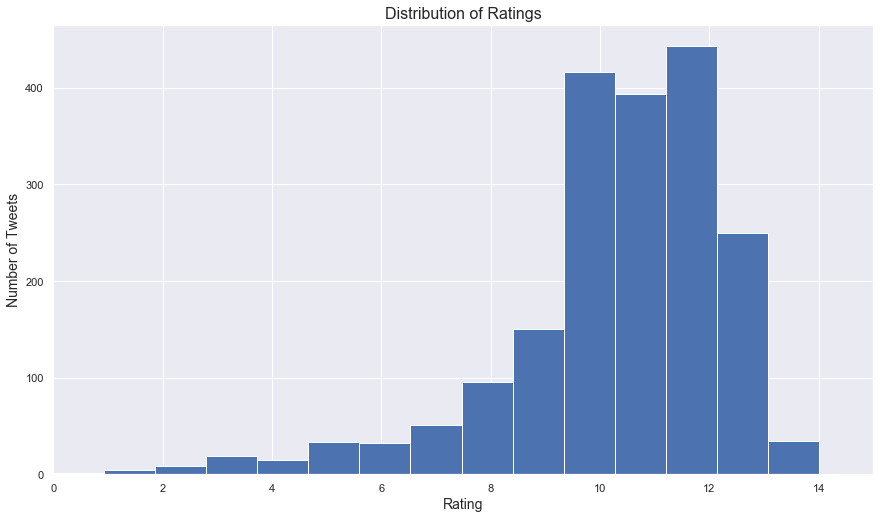

In [605]:
plt.figure(figsize=[14.70, 8.27])
df['rating_numerator'].plot(kind = 'hist', bins = 15)
plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16);

>The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).

In [575]:
# Percentage of tweets with rating of 10 and above
rating_above10 = sum(df['rating_numerator'] >= 10)
rating_above10_perc = round(rating_above10 * 100 / df.shape[0])
print("Number of tweets with rating 10 and above: {}".format(rating_above10))
print("Percentage of tweets: {}%".format(round(rating_above10_perc, 3)))

Number of tweets with rating 10 and above: 1536
Percentage of tweets: 79%


#### What is the most favourited tweet to date? Top 5?

In [578]:
df.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,breed,confidence,name,stage,source,text,expanded_urls
756,744234799360020481,2016-06-18 18:26:18+00:00,13,10,78055,156601,Labrador_retriever,82,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...
302,822872901745569793,2017-01-21 18:26:02+00:00,13,10,43975,133351,Lakeland_terrier,19,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...
391,807106840509214720,2016-12-09 06:17:20+00:00,13,10,56903,120954,Chihuahua,50,Stephan,none,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...
107,866450705531457537,2017-05-22 00:28:40+00:00,13,10,33044,116674,French_bulldog,90,Jamesy,pupper,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...
791,739238157791694849,2016-06-04 23:31:25+00:00,13,10,57857,115648,Eskimo_dog,50,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...


#### What is the most retweeted  tweet to date? Top 5?

In [579]:
df.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,breed,confidence,name,stage,source,text,expanded_urls
756,744234799360020481,2016-06-18 18:26:18+00:00,13,10,78055,156601,Labrador_retriever,82,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...
791,739238157791694849,2016-06-04 23:31:25+00:00,13,10,57857,115648,Eskimo_dog,50,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...
391,807106840509214720,2016-12-09 06:17:20+00:00,13,10,56903,120954,Chihuahua,50,Stephan,none,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...
302,822872901745569793,2017-01-21 18:26:02+00:00,13,10,43975,133351,Lakeland_terrier,19,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...
58,879415818425184262,2017-06-26 19:07:24+00:00,13,10,40660,99474,English_springer,38,Duddles,none,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...


> There are 4 tweets that are in the top 5 for both variables, but the most popular tweet is also the same as the most retweeted tweet; it has been retweeted over 83,000 times and favourited over 164,000 times!

#### What is the most common stage?

In [580]:
with_stage_sum = sum(df['stage'] != 'none')
tweets_with_stage = round(with_stage_sum * 100 / df.shape[0])
print("Number of tweets with stage: {}".format(with_stage_sum))
print("Percentage of tweets: {}%".format(round(tweets_with_stage, 3)))

Number of tweets with stage: 301
Percentage of tweets: 15%


> Only a small proportion of tweets with dog stages identified.

In [582]:
df[df['stage'] != 'none']['stage'].value_counts()

pupper     200
doggo       70
puppo       23
floofer      8
Name: stage, dtype: int64

> pupper is the most common stage.

#### What are the 10 most common breeds of dogs tweeted about? (Excluding the category 'none'.)

In [587]:
str = "Number of tweets with 'none' predicted breed: {} ({}%)"
none_count = sum(df['breed'] == 'none')
none_perc = none_count * 100 / df.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds: {}"
print(str.format(len(df['breed'].unique())))

Number of tweets with 'none' predicted breed: 302 (16%)
Number of distinct breeds: 113


In [588]:
top10_breeds_count = \
df[df['breed'] != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / df.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      154
Labrador_retriever    100
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             49
chow                   47
Samoyed                41
Pomeranian             40
malamute               33
Name: breed, dtype: int64

Top 10 dog breeds make up 37% of all tweets


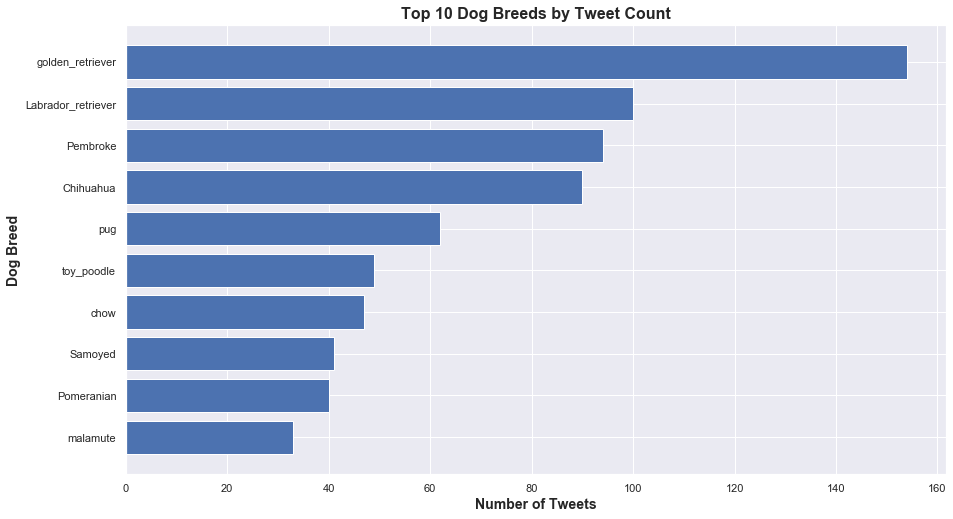

In [604]:
plt.figure(figsize=[14.70, 8.27])
plt.barh(top10_breeds_count.index, top10_breeds_count)
plt.xlabel('Number of Tweets', fontsize = 14, weight = 'bold')
plt.ylabel('Dog Breed', fontsize = 14, weight = 'bold')
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16, weight = 'bold')
plt.gca().invert_yaxis();

> The bar chart above shows that the most common dog that is tweeted about, with 154 tweets, is the Golden Retriever, as identified (predicted) by the neural network. Labrador Retrievers, Pembrokes and Chihuahuas are fairly close together in 2nd, 3rd, and 4th place. Further down we'll take a look at what are the most favourited dog breeds.

### Bivariate Analysis

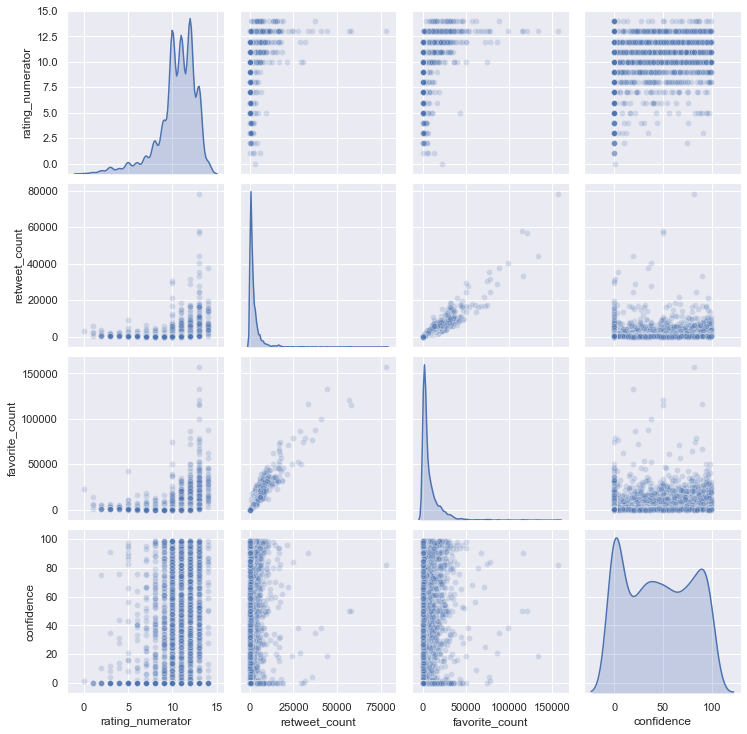

In [602]:
sns.pairplot(df, vars = ['rating_numerator', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

#### Which dog breeds have the highest overall favourite counts?

In [597]:
fav_counts_breed = df[df['breed'] != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts

breed
golden_retriever      1800448
Labrador_retriever    1111171
Pembroke               971815
Chihuahua              719466
French_bulldog         563119
Samoyed                517612
chow                   416183
cocker_spaniel         379851
pug                    350729
malamute               327913
Name: favorite_count, dtype: int64

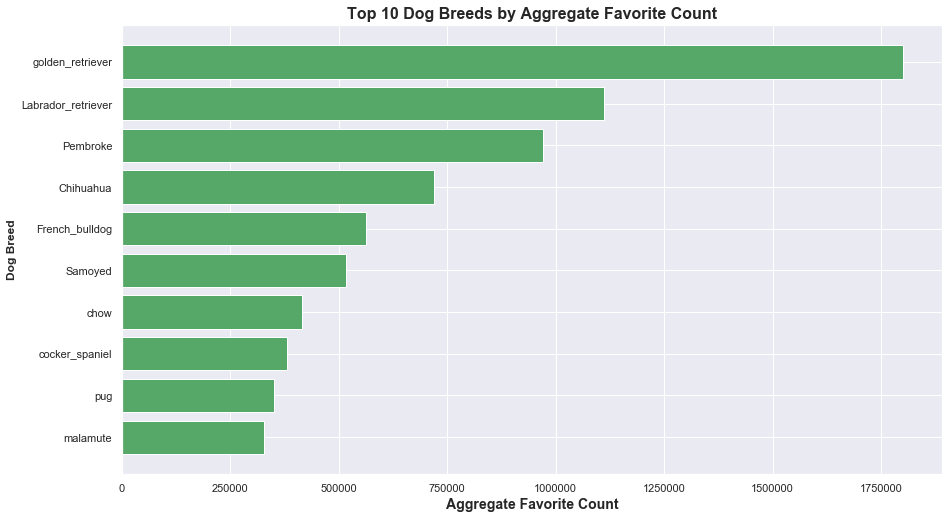

In [606]:
plt.figure(figsize=[14.70, 8.27])
plt.barh(top10_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'g')
plt.xlabel('Aggregate Favorite Count', fontsize = 14, weight = 'bold')
plt.ylabel('Dog Breed', fontsize = 12, weight = 'bold')
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16, weight = 'bold')
plt.gca().invert_yaxis();

> The plot above shows the top 10 dog breeds ranked by aggregate favourite counts. It looks very similar to the barplot ealier of top 10 dog breeds ranked by tweet, and in fact the top 4 dog breeds are the same. This also makes sense, as these dogs have the highest number of tweets.

In [607]:
list(set(top10_breeds_count.index) & set(top10_breeds_fav_counts.index))

['pug',
 'chow',
 'Chihuahua',
 'Samoyed',
 'Labrador_retriever',
 'golden_retriever',
 'Pembroke',
 'malamute']

> Both groups have these 8 dog breeds in common.

#### How are ratings distributed within each of the dog breeds with highest favourite counts?

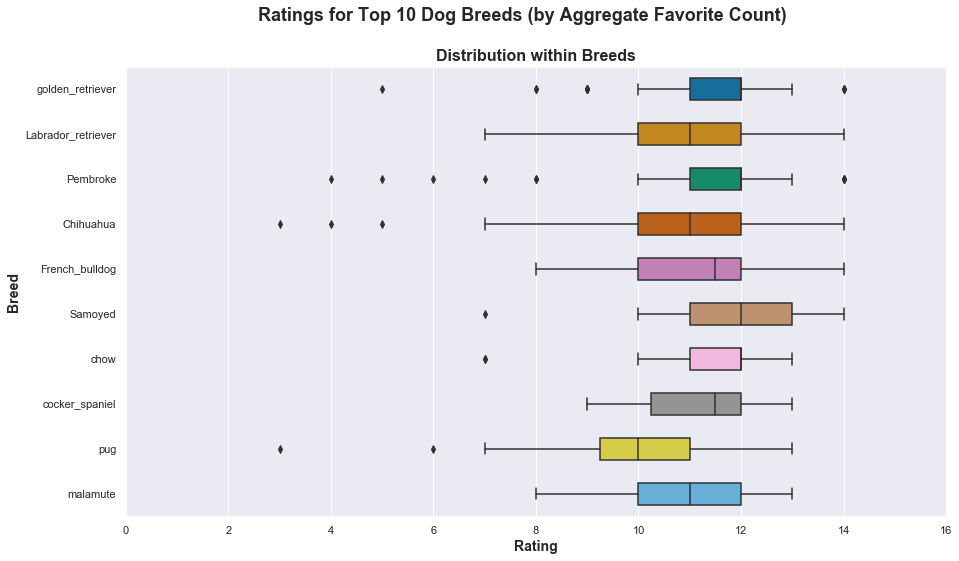

In [609]:
plt.figure(figsize=[14.70, 8.27])
bplot = sns.boxplot(y = 'breed', x = 'rating_numerator',
                    data = df,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 16)

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18, weight = 'bold')
plt.title('Distribution within Breeds', fontsize = 16, weight = 'bold')
plt.ylabel("Breed",  fontsize = 14, weight = 'bold')
plt.xlabel('Rating',  fontsize = 14, weight = 'bold');

> The boxplot here shows the distribution of ratings within each of the top 10 dog breeds as ranked by aggregate favourite count. All the breeds range between 7 and 13, with a only a few outliers, while four of the breeds have the lower ratings at 10. Another four breeds have the highest ratings at 14.

#### How are tweet ratings distributed by day?

In [619]:
# Add random amount of float between [0.0:0.7) to input x
def jitter(x):
    random.seed()
    return x + random.uniform(0, 0.7)

In [613]:
# Return the number of days from a timedelta object x
def days_from_start(x):
    return x.days

# Dtart date
first_day = df.timestamp.min()

# Array with days corresponding to timestamp
we_rate_dogs_days = (df.timestamp - first_day).apply(days_from_start)

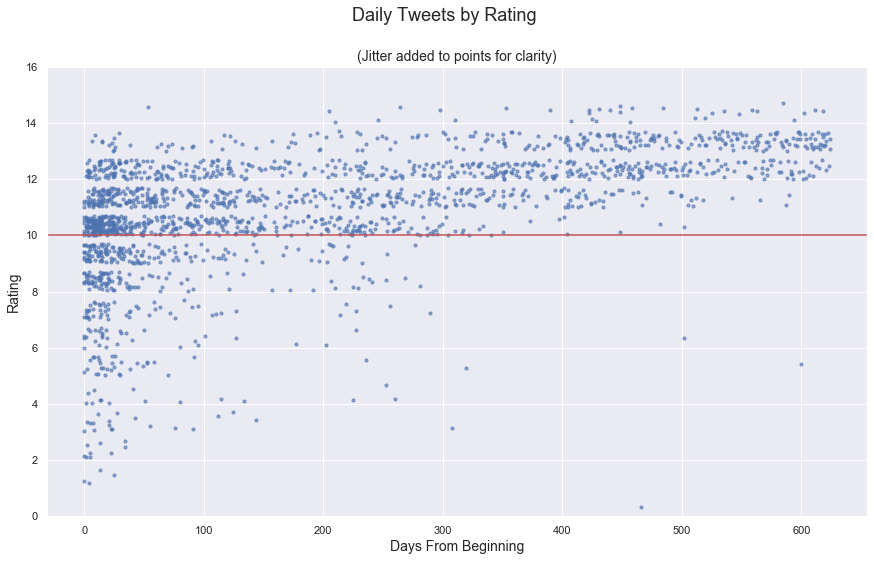

In [624]:
plt.figure(figsize=[14.70, 8.27])

# Add jitter to the rating so it's not so cluttered on each line
rating_jitter = df['rating_numerator'].apply(jitter)

plt.scatter(we_rate_dogs_days, rating_jitter, s = 10, alpha = 0.6)

# Title and labels
plt.suptitle('Daily Tweets by Rating', fontsize = 18)
plt.title('(Jitter added to points for clarity)', fontsize = 14)

plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)

# Add the line at 10 for reference; ratings are out of 10
plt.axhline(y = 10, color = 'r')
plt.ylim(0, 16)

plt.show();

> The plot here has the tweet ratings by day, showing how the ratings are generally over 10 in the latter half of the time period, after the account has been running for 300 days

### Multivariate Analysis

#### Relationship between favourite and retweet counts with dog rating as colour.

Adapted from an answer from [StackOverflow](https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes).

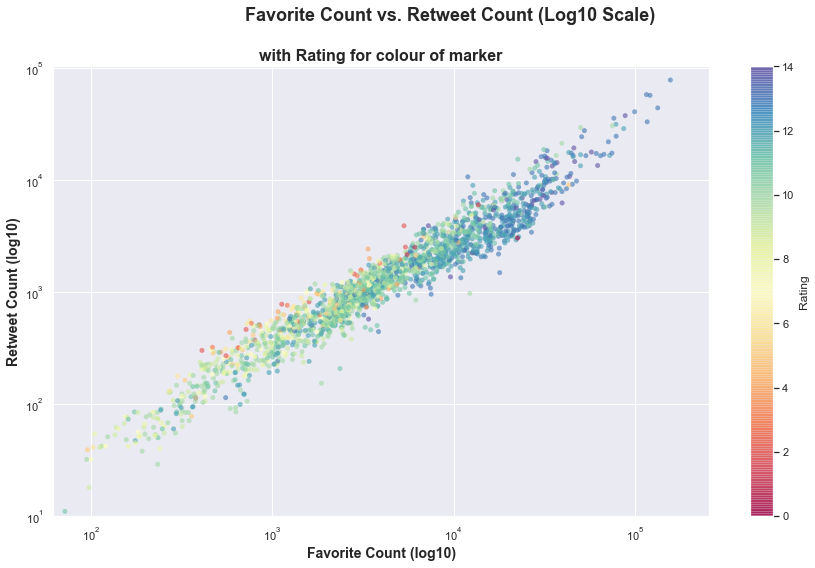

In [637]:
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize=[14.70, 8.27])
plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating_numerator']
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 18, weight = 'bold')
plt.title('with Rating for colour of marker', fontsize = 16, weight = 'bold')
plt.xlabel('Favorite Count (log10)', fontsize = 14, weight = 'bold')
plt.ylabel('Retweet Count (log10)', fontsize = 14, weight = 'bold')

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating');

#### Favourite counts over time, with dog rating as colour.

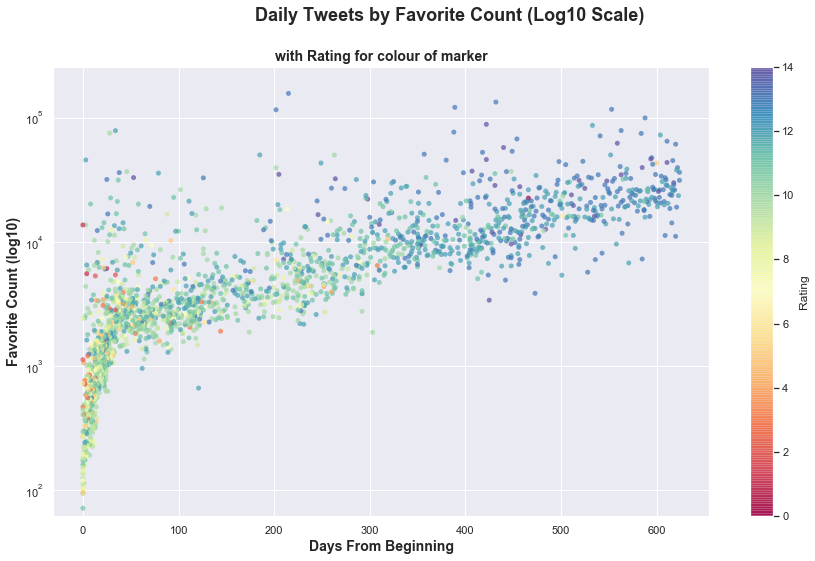

In [638]:
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize=[14.70, 8.27])

plt.yscale('log')
plt.ylim(df['favorite_count'].min() - 10, 
         df['favorite_count'].max() + 100000)
colours = df['rating_numerator']
markers = 25

plt.scatter(we_rate_dogs_days, df['favorite_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.7)

# title and labels
plt.suptitle('Daily Tweets by Favorite Count (Log10 Scale)', fontsize = 18, weight = 'bold')
plt.title('with Rating for colour of marker', fontsize = 14, weight = 'bold')
plt.xlabel('Days From Beginning', fontsize = 14, weight = 'bold')
plt.ylabel('Favorite Count (log10)', fontsize = 14, weight = 'bold')

cbar = plt.colorbar()
cbar.set_label('Rating');

> In this plot the x-axis scale is reversed showing time in the past, and moving forward from left to right. Clearly, the more recent tweets (younger/fewer days old on the right side) are rated consistently higher (blue and green) than much older tweets (yellow and green). Also interesting is that tweets older than 1100 days have lower favourite counts; this is most likely because this was at the start of the twitter account, and so there weren't as many followers at the time.
>
>The slope of the line is also increasing at a steady rate from around 1100 days, reflecting the daily increase in tweets being favourited. This clearly shows that the twitter account followers were active, and possibly growing, during the timeframe represented in the archive.
>
>The older tweets also have much more variability in ratings as seen by the range of colours (more yellow and green), and also in the range of favorite_count.